In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from auxiliary import *
import numpy as np
import scipy 

In [2]:
#Basic Concepts
rng = np.random.default_rng(42)

dados = rng.integers(1,7, size = 1_000_000)

In [3]:
dados

array([1, 5, 4, ..., 6, 1, 1])

In [4]:
pd.Series(dados).value_counts().sort_index()

1    166904
2    166781
3    166479
4    167184
5    166423
6    166229
Name: count, dtype: int64

In [5]:
values, count = np.unique(dados, return_counts=True)

print(values)
print(count)

[1 2 3 4 5 6]
[166904 166781 166479 167184 166423 166229]


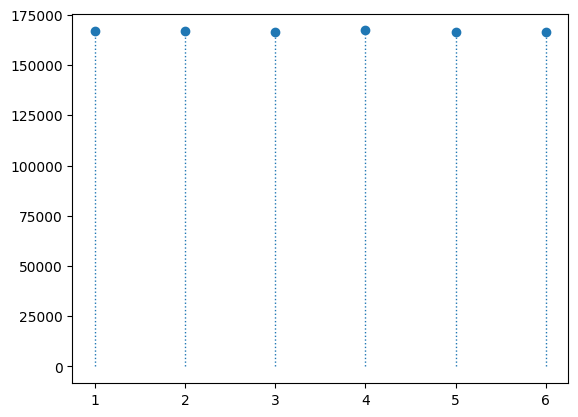

In [6]:
plt.vlines(values, 0, count, linewidth=1, linestyles='dotted')
plt.scatter(values, count)
plt.show()

In [7]:
# The probability of rolling a 1 is 1/6, and the probability of rolling a 2 is also 1/6, and so on.
# The probability of not rolling a 1 is 5/6.
# p + q = 1
# p = 1/6

## Type of Events

In [8]:
# Dependent events or independent events?
# E/And = *
# Independent events
# The probability of rolling a 1 on the first roll and a 1 on the second roll is (1/6) * (1/6) = 1/36.

# Dependent events
# OU/ Or = +
# Mutually exclusive events
# The probability of rolling a 1 or a 2 is (1/6) + (1/6) = 2/6 = 1/3.

## Probability Distribution

In [9]:
# Types of variables
# Discrete ramdom variables, only assume integer values.
#eg. Number of passengers in a bus, number of children in a family, number of cars in a parking lot.

# Continuous random variables, assume any value in a given interval.
#eg. Height of a person, weight of a person, temperature in a city.

In [10]:
df_accidents = pd.DataFrame(
    {
        'accidents': [0,1,2,3],
        'frequency': [22,5,2,1]
    }
)

df_accidents

accidents  frequency
0          0         22
1          1          5
2          2          2
3          3          1

In [11]:
# Probability of not getting into an accident
df_accidents['p_not_accident'] = df_accidents['frequency'] / df_accidents['frequency'].sum()

df_accidents

accidents  frequency  p_not_accident
0          0         22        0.733333
1          1          5        0.166667
2          2          2        0.066667
3          3          1        0.033333

In [12]:
df_accidents['p_not_accident'].sum()

np.float64(0.9999999999999999)

## Probability - Discrete Variables

In [13]:
#Uniform distribution
# The uniform distribution is a continuous probability distribution that has constant probability.
from scipy.stats import randint

dice = randint.rvs(1, 7, size=100, random_state=42)
dice

array([4, 5, 3, 5, 5, 2, 3, 3, 3, 5, 4, 3, 6, 5, 2, 4, 6, 6, 2, 4, 5, 1,
       4, 2, 6, 5, 4, 1, 1, 3, 3, 2, 4, 4, 6, 6, 6, 3, 4, 4, 1, 3, 5, 3,
       5, 1, 2, 4, 1, 4, 6, 2, 2, 1, 2, 5, 2, 4, 4, 4, 4, 5, 3, 6, 1, 4,
       2, 4, 2, 6, 6, 6, 2, 4, 6, 5, 2, 2, 4, 2, 2, 6, 4, 6, 6, 4, 1, 6,
       5, 5, 2, 5, 2, 1, 4, 4, 4, 5, 1, 5])

In [14]:
type(dice)

numpy.ndarray

[1 2 3 4 5 6]
[11 19 11 25 17 17]


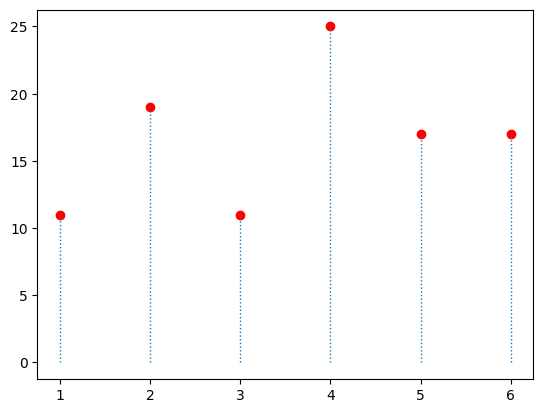

In [15]:
values, count = np.unique(dice, return_counts=True)
print(values)
print(count)

plt.vlines(values, 0, count, linewidth=1, linestyles='dotted')
plt.scatter(values, count, marker='o', color='red')
plt.show()

In [16]:
#pmf = probability mass function - Probability of a discrete random variable

x = np.arange(1, 7)
y = randint.pmf(x, 1, 7)

#y
print(*tuple(zip(x,y)), sep='\n')

(np.int64(1), np.float64(0.16666666666666666))
(np.int64(2), np.float64(0.16666666666666666))
(np.int64(3), np.float64(0.16666666666666666))
(np.int64(4), np.float64(0.16666666666666666))
(np.int64(5), np.float64(0.16666666666666666))
(np.int64(6), np.float64(0.16666666666666666))


In [17]:
#cdf = cumulative distribution function - Probability of a discrete random variable
x = np.arange(1, 7)
y = randint.cdf(x, 1, 7)

print(*tuple(zip(x,y)), sep='\n')

(np.int64(1), np.float64(0.16666666666666666))
(np.int64(2), np.float64(0.3333333333333333))
(np.int64(3), np.float64(0.5))
(np.int64(4), np.float64(0.6666666666666666))
(np.int64(5), np.float64(0.8333333333333334))
(np.int64(6), np.float64(1.0))


In [18]:
randint.cdf(3, 1, 7) # Probability of rolling a 1

np.float64(0.5)

In [19]:
#ppf = percent point function - Inverse of the cdf
randint.ppf(0.5, 1, 7) # Probability of rolling a 1

np.float64(3.0)

## Discrete Variable Probability Distribution

In [21]:
from scipy.stats import binom
# Binomial distribution
# 1 experiment * 10 trials
currency = binom.rvs(
    10                  # Number of trials
    , 0.5               # Probability of success
    , size=1            # Number of experiments
    , random_state=42   # Random state
)


currency

array([4])

In [ ]:
# Manual calculation
import math

math.factorial(10) / (math.factorial(4) * math.factorial(10 - 4)) * 0.5 ** 4 * ( 1 - 0.5) ** (10 - 4)

0.205078125

[ 0  1  2  3  4  5  6  7  8  9 10]
[  1000   9716  43515 117067 205347 245968 205493 116929  44218   9768
    979]


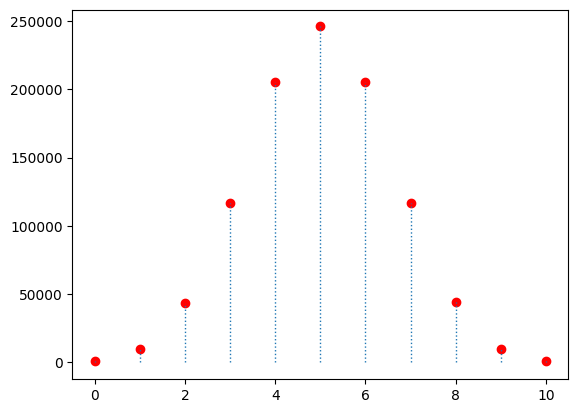

In [25]:
import matplotlib.pyplot as plt
import numpy as np

currency_trials = binom.rvs(
    10                  # Number of trials
    , 0.5               # Probability of success
    , size=1_000_000            # Number of experiments
    , random_state=42   # Random state
)

values, count = np.unique(currency_trials, return_counts=True)

print(values)
print(count)

plt.vlines(values, 0, count, linewidth=1, linestyles='dotted')
plt.scatter(values, count, marker='o', color='red')

plt.show()

In [26]:
# Automated calculation
x = np.arange(0, 11)
y = binom.pmf(x, 10, 0.5)
print(*tuple(zip(x,y)), sep='\n')

(np.int64(0), np.float64(0.000976562499999999))
(np.int64(1), np.float64(0.009765625000000003))
(np.int64(2), np.float64(0.04394531250000005))
(np.int64(3), np.float64(0.11718749999999999))
(np.int64(4), np.float64(0.2050781249999999))
(np.int64(5), np.float64(0.24609375))
(np.int64(6), np.float64(0.2050781249999999))
(np.int64(7), np.float64(0.11718749999999996))
(np.int64(8), np.float64(0.04394531250000005))
(np.int64(9), np.float64(0.009765625000000003))
(np.int64(10), np.float64(0.0009765625))


In [27]:
## Need to get the function from the class in order to plot the graph


# Parei na 11, mas preciso revisar da 8 para frente eu acho